# SPIRL Fall 2021 Course -- Week 2 (Sep 28)

Today's topic will include:
1. The use of dictionary (`dict`)
2. The use of `for` loop 
3. Advance plotting using `Axes`
4. Quick and easy polynomial fitting using `np.polyfit`

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following SPIRL chapters before turning in your assignment:

- [Ch. 3.7 Loops](https://cjtu.github.io/spirl/python_loops.html#loops)
- [Ch. 3.8.4 Dictionary (dict)](https://cjtu.github.io/spirl/python_adv-types.html?highlight=dictionary#dictionary-dict)

September 28, 2021\
Instructor: Shih-Yun Tang

## Application of disctionatry, `dict`

In week 1, we talked about passing the `g` value into the `free_fall_h_grav` function so one can get the free fall distance under different objects orbiting around the Sun.
However, a better way for complishing this might be let the user to pass the name of the objects instead of the `g` value.
In this section, we will use the dictionary (`dict` or in the form of `{}`) to do the job.


In [255]:

# --------------- keys ---- values -------
object_g_dict = {'mercury': 3.61,
                 'venus'  : 8.83,
                 'earth'  : 9.80665,
                 'mars'   : 3.75,
                 'jupiter': 26.0,
                 'saturn' : 11.2,
                 'uranus' : 10.5,
                 'neptune': 13.3,
                 'pluto'  : 0.61 
                 }

In [258]:
# accessing the "value" by passing the "key"
object_n = 'mars'

print( object_g_dict[object_n] )

3.75


In [ ]:
# you can acessing the keys/values by
object_g_dict.keys()

object_g_dict.values()


In [39]:
# and use `list` function to transfer it into a list object
object_name = list(object_g_dict.keys())

## string in python is case sensitive

To make sure you nenver run into issue with upper vs lower case, passing your string all in lower case if a good practive.

In [259]:
object_name_input = 'Mars'

print( object_name_input.lower() )

mars


## [Adance Move] make your dictionary from two list using `dict` and `zip`

If you already have two lists and they both have the same length, you can use `dict` + `zip` to help you build up the list fatser.

In [18]:

object_name = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']
object_g    = [3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3, 0.61]


list(zip(object_name, object_g))


[('mercury', 3.61),
 ('venus', 8.83),
 ('earth', 9.80665),
 ('mars', 3.75),
 ('jupiter', 26.0),
 ('saturn', 11.2),
 ('uranus', 10.5),
 ('neptune', 13.3),
 ('pluto', 0.61)]

In [ ]:
object_g_dict = dict(zip(object_name, object_g))
object_g_dict.keys()

Now, we can rewrite the function to take in the object (planet) names instead of the `g` values!

In [265]:
def free_fall_on_SS_objects(t, object_n = 'mars'):
    """Free fall distance given time t on Earth.

    Args:
        t (float or np.array): 
            Time in [s]
        object_n (str, optional): 
            object name you wish to calculate for the free-fall height. 
            Defaults to 'mars'.

    Returns:
        [float or np.array]: Free fall distance in [m]
    """
     
    object_n = object_n.lower()    # transfer all to lower cases
    g = object_g_dict[object_n]    # get g values [m/s]
    
    H = 0.5 * g * t**2
    
    return H


## The use of `for` loops

See more on [Ch. 3.7 Loops](https://cjtu.github.io/spirl/python_loops.html#loops)

In [264]:
# for loop basic 

loop_range = [1, 3, 5, 7, 9]
loop_range = list(range(1, 10, 2))

for i in range(1, 10, 2):
    
    print(i)

1
3
5
7
9


In [274]:
object_name = list( object_g_dict.keys() )

for tar_name in object_name:
    
    y = free_fall_on_SS_objects(x, tar_name) # get free-fall distance
    g = object_g_dict[tar_name]              # get the g value for each object_name objects
    
    temp_str = f'The g value for {tar_name:>8} is about {g:5.2f} m/s/s'
    print( temp_str )

The g value for  mercury is about  3.61 m/s/s
The g value for    venus is about  8.83 m/s/s
The g value for    earth is about  9.81 m/s/s
The g value for     mars is about  3.75 m/s/s
The g value for  jupiter is about 26.00 m/s/s
The g value for   saturn is about 11.20 m/s/s
The g value for   uranus is about 10.50 m/s/s
The g value for  neptune is about 13.30 m/s/s
The g value for    pluto is about  0.61 m/s/s


## Advance plotting with `axes`

[matplotlib color palette sheet](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)

In [275]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$-x^2$')

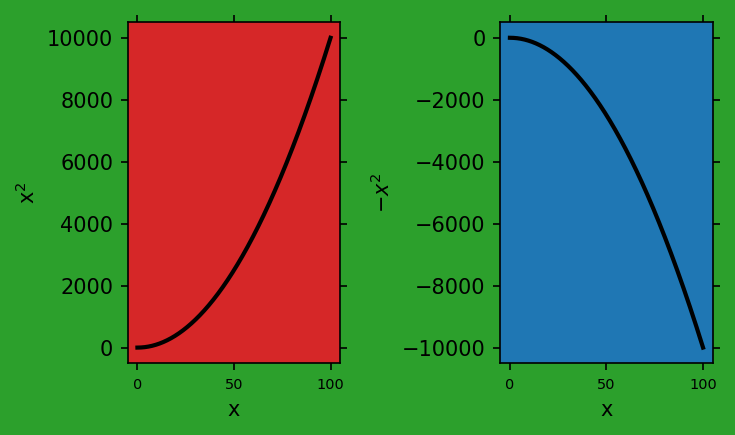

In [276]:
# make the master frame
f = plt.figure(facecolor='tab:green', figsize=(5,3), dpi=150)

# add in subplot frames
ax1 = plt.subplot(121, facecolor='tab:red')
ax2 = plt.subplot(122, facecolor='tab:blue')

_x = np.linspace(0, 100, 1000)
# plotting on difference frames
ax1.plot(_x, _x**2, lw=2, color='k')
ax1.set_xlabel('x')
ax1.set_ylabel('x$^2$')

ax2.plot(_x, -_x**2, lw=2, color='k')
ax2.set_xlabel('x')
ax2.set_ylabel('$-x^2$')

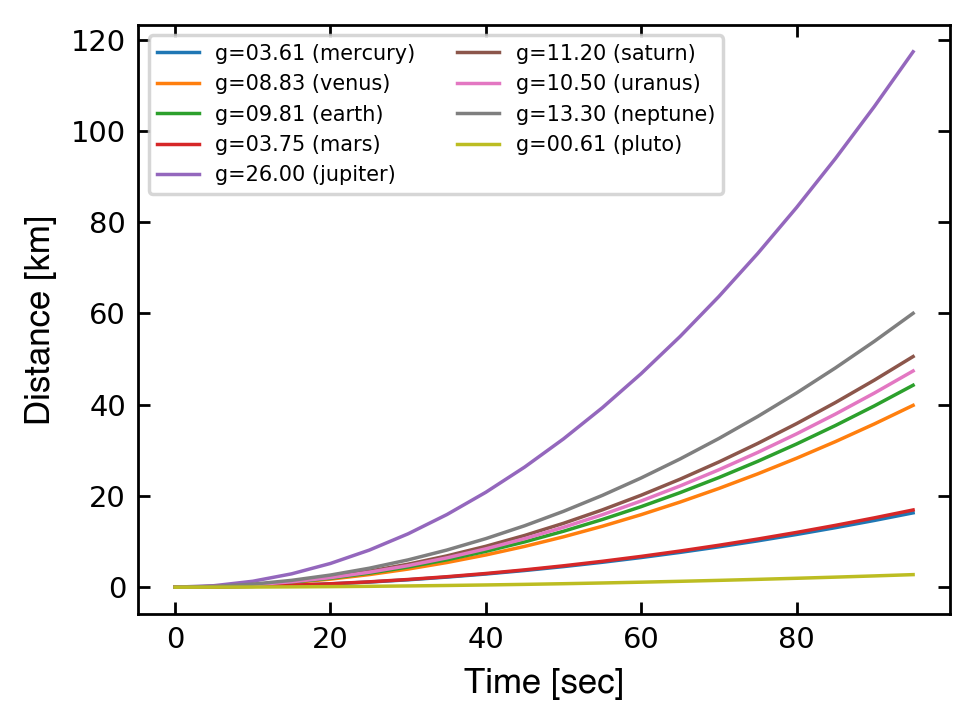

In [279]:
x = np.arange(0, 100, 5) # falling time [s]

# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250 )
ax1 = plt.subplot(111)


# --- plotting all free-fall curves for SS objects (planets) ----
for tar_name in object_name:
    
    y = free_fall_on_SS_objects(x, tar_name)
    g = object_g_dict[tar_name]
    
    ax1.plot(x, y/1e3, '-', lw=1, label = f'g={g:05.2f} ({tar_name})')
    

# --- plotting adjustments ---   
ax1.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('Time [sec]',    size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('Distance [km]', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.legend(fontsize=6, ncol = 2)

## np.poly1d

In [186]:
x_fit = np.linspace(0, 100, 30)
y_fit = 3 + 3 * x_fit

err1 = np.zeros(10)+10
err2 = np.zeros(10)+3
err3 = np.zeros(10)+2
y_SN = np.concatenate((err1, err2, err3), axis=None)
y_err = y_fit/y_SN
y_fit_erradd = [np.random.normal(i,j,1)[0] for i, j in zip(y_fit, y_err)]

x = np.round(x_fit, 3)
y = np.round(y_fit_erradd, 3)
y_err = np.round(y_err, 3)


y_err

array([  0.3  ,   1.334,   2.369,   3.403,   4.438,   5.472,   6.507,
         7.541,   8.576,   9.61 ,  35.483,  38.931,  42.379,  45.828,
        49.276,  52.724,  56.172,  59.621,  63.069,  66.517, 104.948,
       110.121, 115.293, 120.466, 125.638, 130.81 , 135.983, 141.155,
       146.328, 151.5  ])

## Quick and easy polynomical fitting using `np.ployfit`

In [280]:
help( np.polyfit )

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [282]:
x = np.array([  0.   ,   3.448,   6.897,  10.345,  13.793,  17.241,  20.69 ,
                24.138,  27.586,  31.034,  34.483,  37.931,  41.379,  44.828,
                48.276,  51.724,  55.172,  58.621,  62.069,  65.517,  68.966,
                72.414,  75.862,  79.31 ,  82.759,  86.207,  89.655,  93.103,
                96.552, 100.   ])
y = np.array([  3.403,  12.761,  22.422,  34.   ,  43.701,  58.525,  67.867,
                71.998,  87.14 ,  86.822, 130.066,  79.842, 104.269, 119.987,
                153.925,  86.582, 273.286, 119.237, 211.643, 270.858, 313.429,
                253.465, 375.543,  65.478, 353.615, 346.736, 434.706, 343.462,
                358.991, 477.203])
y_err = np.array([  0.3  ,   1.334,   2.369,   3.403,   4.438,   5.472,   6.507,
                    7.541,   8.576,   9.61 ,  35.483,  38.931,  42.379,  45.828,
                    49.276,  52.724,  56.172,  59.621,  63.069,  66.517, 104.948,
                    110.121, 115.293, 120.466, 125.638, 130.81 , 135.983, 141.155,
                    146.328, 151.5  ])


Text(0, 0.5, 'y')

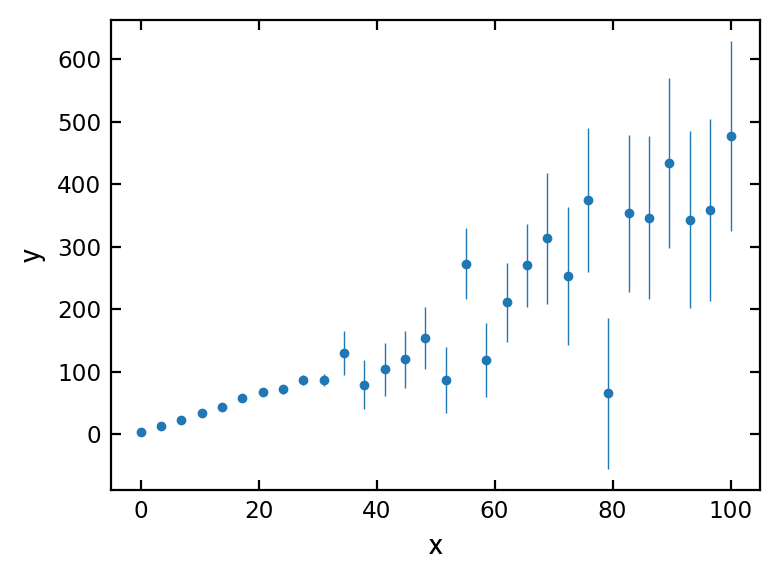

In [284]:
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax1 = plt.subplot(111)

ax1.errorbar(x, y, 
             yerr = y_err, fmt = '.', ms=5, lw=0.5)
      
ax1.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x',    size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')

In [285]:

# ------------ x-axis -- y-axis -- fit with nth order --
z = np.polyfit( x,        y,        1)

print( z )

[  4.1371426  -28.15839687]


In [287]:
print(f'y = {z[0]:1.2f}x + {z[1]:1.2f}')

y = 4.14x + -28.16


# Then you can use `np.poly1d` to take in the coeffition and generate a function

Text(0, 0.5, 'y')

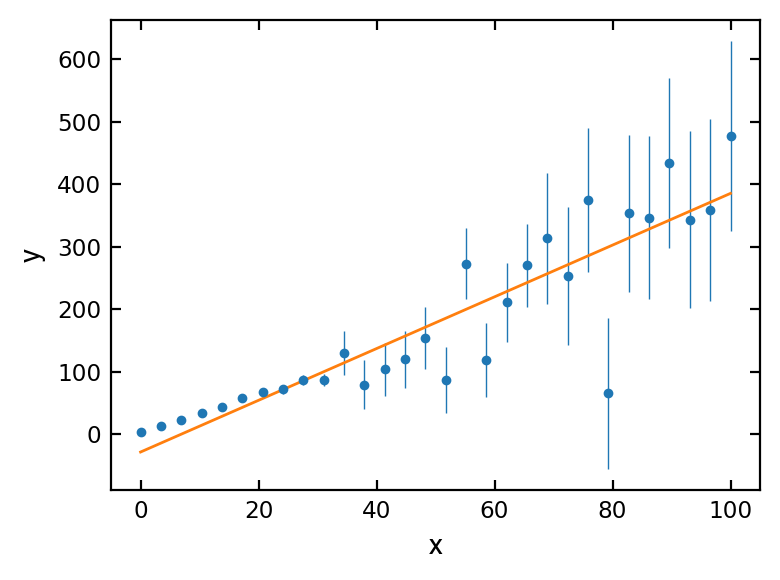

In [289]:
# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax1 = plt.subplot(111)

# --- plot the data with error ----
ax1.errorbar(x, y, 
             yerr = y_err, fmt = '.', ms=5, lw=0.5)

# --- fitting ---
coef = np.polyfit(x, y, 1)
f1 = np.poly1d(coef)

# --- plot the fitted line ---
ax1.plot(x, f1(x), '-', lw=1)
    
# --- plotting adjustments ---   
ax1.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')

## [Adcance Move] take in the error as weight while fitting

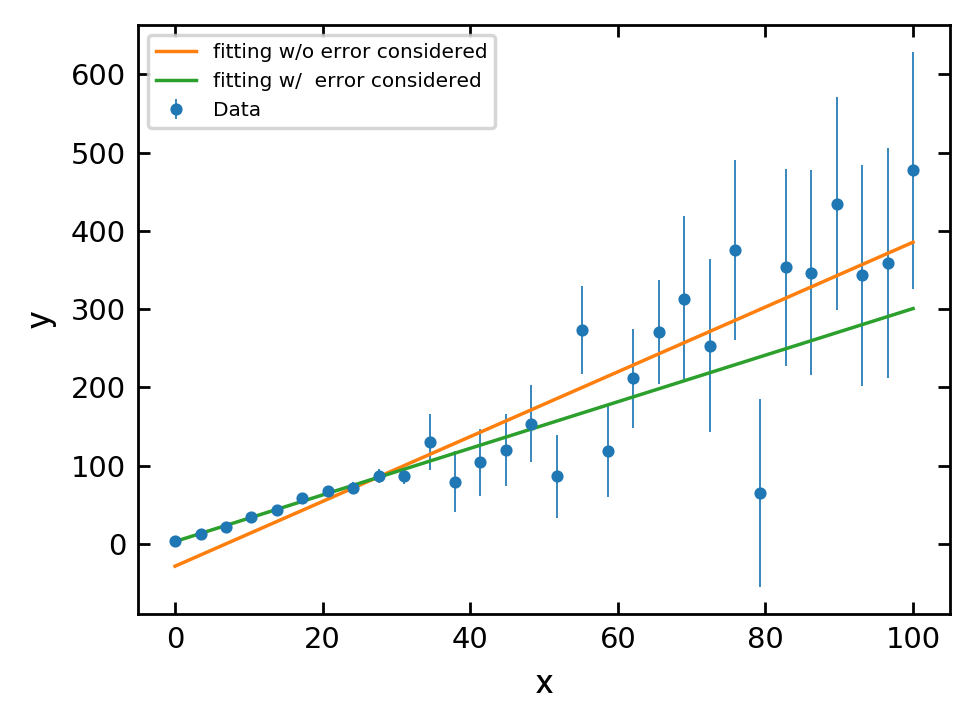

In [292]:
# --- plotting setup ----
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250 )
ax1 = plt.subplot(111)

# --- plot the data with error ----
ax1.errorbar(x, y, 
             yerr = y_err, fmt = '.', ms=5, lw=0.5, label = 'Data')

# --- fitting ---
coef1 = np.polyfit(x, y, 1)
f1 = np.poly1d(coef1)

# --- fitting with error as weight ---
coef2 = np.polyfit(x, y, 1, w= 1/ y_err)
f2 = np.poly1d(coef2)

ax1.plot(x, f1(x), '-', lw=1, label = 'fitting w/o error considered')
ax1.plot(x, f2(x), '-', lw=1, label = 'fitting w/  error considered')
    
    
ax1.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.legend(fontsize = 'xx-small', loc = 'upper left')

In [293]:
def free_fall_h_g(t, g = 11.2):
    
    H = 0.5 * g * t**2
    
    return H

In [308]:
x_fit = np.linspace(20, 251, 30)
y_fit = free_fall_h_g(x_fit, g = 11.2)


err1 = np.zeros(10)+5
err2 = np.zeros(10)+3
err3 = np.zeros(10)+10
y_SN = np.concatenate((err1, err2, err3), axis=None)
y_err = y_fit/y_SN
y_fit_erradd = [np.random.normal(i,j,1)[0] for i, j in zip(y_fit, y_err)]

x = np.round(x_fit, 3)
y = np.round(y_fit_erradd, 3)
y_err = np.round(y_err, 3)


In [313]:
y_err

array([  448.   ,   875.919,  1445.964,  2158.136,  3012.435,  4008.861,
        5147.413,  6428.093,  7850.899,  9415.832, 18538.153, 21620.131,
       24938.986, 28494.72 , 32287.332, 36316.821, 40583.189, 45086.435,
       49826.558, 54803.56 , 18005.232, 19640.459, 21346.75 , 23124.104,
       24972.521, 26892.002, 28882.547, 30944.154, 33076.825, 35280.56 ])

## [Assignment] Guess which SS planet was the data been taken from!!

Below are 30 data points taken from an unknown SS planets by measuring the free-fall time [s] verse the distance [m] on it.
Each data of the falling distance is an average value from 10 different measurements and their standard deviation is given as error, fall_distance_err [m].

1) Please use the `np.polyfit` we learn above to fit the data and obtain the `g` values so that you can guess wich SS planets you are on.
2) Please make a plot showing the data, their error and also show the fitting result you get.

Free-fall equation:
$$
H = \frac{1}{2} g t^2
$$


In [316]:
time_steps = np.array([ 20.   ,  27.966,  35.931,  43.897,  51.862,  59.828,  67.793,
                    75.759,  83.724,  91.69 ,  99.655, 107.621, 115.586, 123.552,
                    131.517, 139.483, 147.448, 155.414, 163.379, 171.345, 179.31 ,
                    187.276, 195.241, 203.207, 211.172, 219.138, 227.103, 235.069,
                    243.034, 251.   ])

fall_distance = np.array([  2798.322,   4543.523,   5459.432,  11554.559,  15958.431,
                        20023.776,  19146.256,  22765.371,  47183.159,  47167.289,
                        22978.494,  66253.599,  63625.642,  91050.12 , 116941.625,
                        143460.073, 106462.323, 142584.887, 199564.683,  83593.839,
                        158030.907, 205442.175, 206733.665, 241555.039, 236078.303,
                        240508.665, 311193.102, 298704.903, 339502.307, 438338.605])

fall_distance_err = np.array([  448.   ,   875.919,  1445.964,  2158.136,  3012.435,  4008.861,
                            5147.413,  6428.093,  7850.899,  9415.832, 18538.153, 21620.131,
                            24938.986, 28494.72 , 32287.332, 36316.821, 40583.189, 45086.435,
                            49826.558, 54803.56 , 18005.232, 19640.459, 21346.75 , 23124.104,
                            24972.521, 26892.002, 28882.547, 30944.154, 33076.825, 35280.56 ])

Text(0, 0.5, 'y')

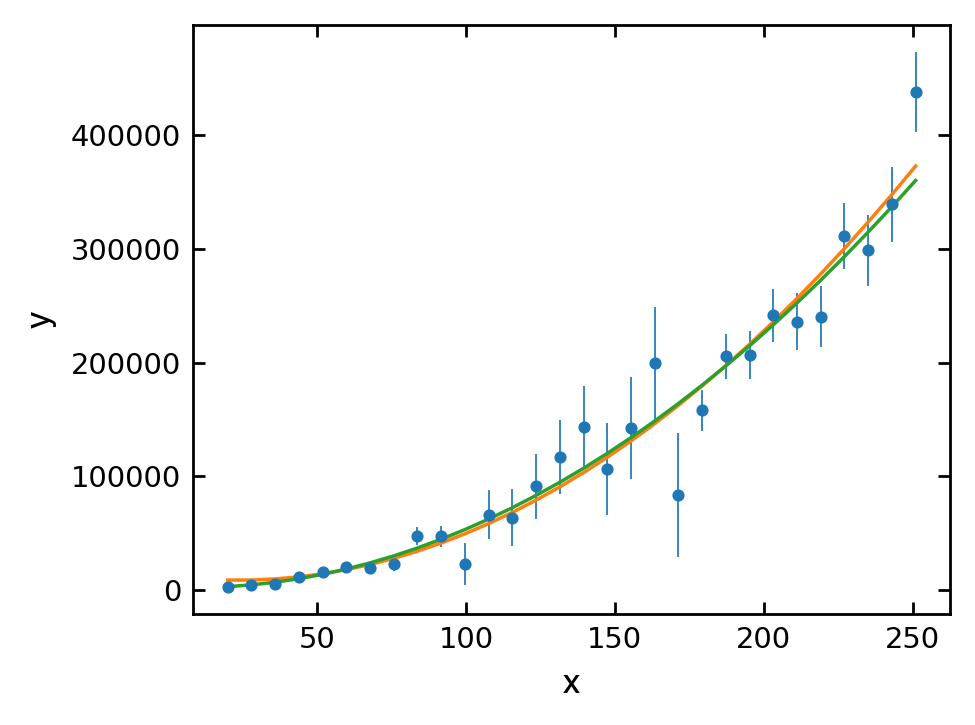

In [317]:
f = plt.figure(facecolor='white', figsize=(4,3), dpi=250 )
ax1 = plt.subplot(111)

# ax1.plot(x_fit, y_fit, '.', ms=5)
ax1.errorbar(time_steps, fall_distance, 
             yerr = fall_distance_err, fmt = '.', ms=5, lw=0.5)

z1 = np.polyfit(time_steps, fall_distance, 2)
p1 = np.poly1d(z1)

z2 = np.polyfit(time_steps, fall_distance, 2, w= 1/ fall_distance_err)
p2 = np.poly1d(z2)

ax1.plot(x, p1(time_steps), '-', lw=1)
ax1.plot(x, p2(time_steps), '-', lw=1)
    
    
ax1.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('x',    size='medium', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('y', size='medium', style='normal', family='sans-serif', fontname='Helvetica')